###Uploading Dataset

###Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score   
import random

C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


###Checking Correlation

In [2]:
dataset = pd.read_csv('C:/users/akshi/downloads/creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

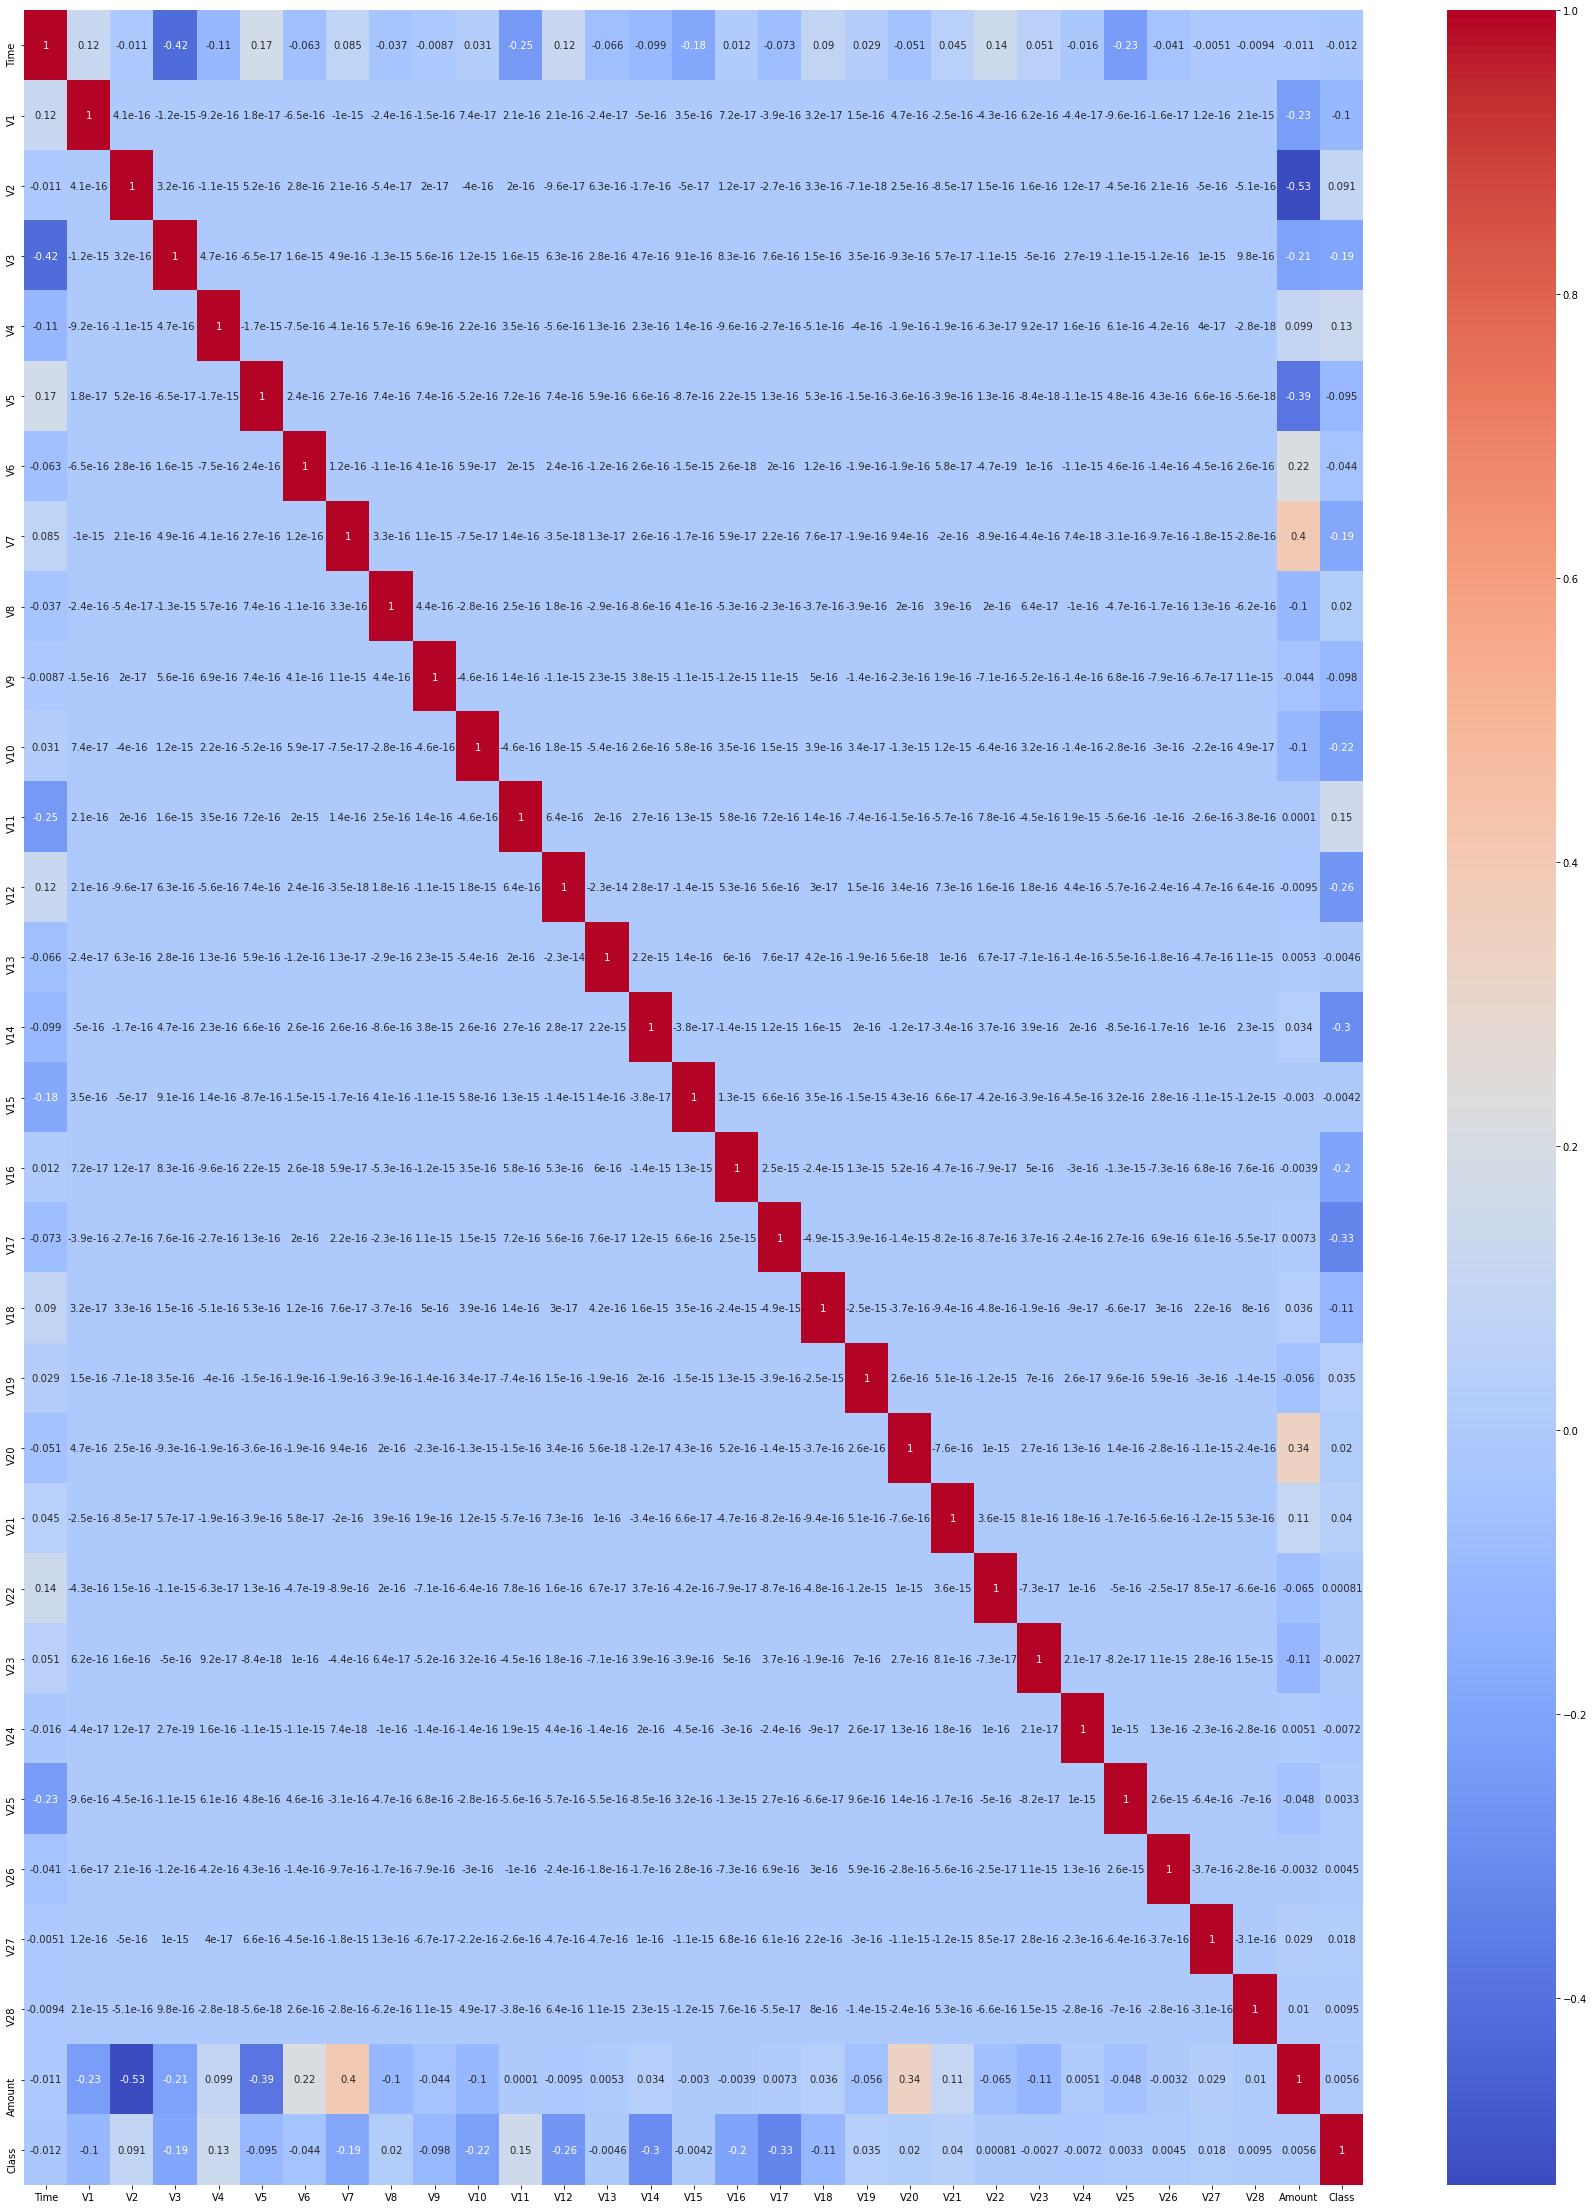

In [5]:
corr = dataset.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
X = dataset.drop(columns=['Class','V2'], axis=1)
Y = dataset['Class']

####Over-sampling as dataset is imbalanced

In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_b, y_b = ros.fit_resample(X, Y)

In [8]:
y_b.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [9]:
x_b['Class'] = y_b

In [10]:
x_b

,Time,V1,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,34521.0,1.081234,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1
568626,53658.0,-1.739341,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,-2.996669,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
568627,34687.0,-0.860827,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,-7.060746,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1
568628,40276.0,1.159373,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,...,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1.00,1


###Sampling 1 - Simple Random Sampling

In [11]:
# Simple Random Sampling
simp_sample = x_b.sample(n = 1067, random_state=42)

# x and y division
x = simp_sample.loc[:,simp_sample.columns!='Class']
y = simp_sample.loc[:,simp_sample.columns=='Class']

# Training-Testing Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
score = accuracy_score(xgb_pred, y_test)
print(score)

# Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
score = accuracy_score(logr_pred, y_test)
print(score)

# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
score = accuracy_score(dtree_pred, y_test)
print(score)

# SVM
from sklearn.svm import SVC  
svm = SVC() 
svm.fit(x, y) 
svm_pred = svm.predict(x_test)
score = accuracy_score(svm_pred, y_test)
print(score)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
score = accuracy_score(gnb_pred, y_test)
print(score)

# KNN
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(x_train, y_train)
# knn_pred = knn.predict(x_test)
# score = accuracy_score(knn_pred, y_test)
# print(score)

# Sampling 1 - Simple Random Sampling
# sampling1 = [accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
#                                           accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100,
#                                           accuracy_score(y_test,xgb_pred)*100]

0.951310861423221
0.9250936329588015
0.9176029962546817


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

0.6329588014981273
0.8277153558052435


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
conclusion1 = pd.DataFrame({'Models': ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"],
                           'Accuracies': [accuracy_score(y_test,xgb_pred)*100,accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
                                          accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100]})
conclusion1.sort_values('Accuracies', ascending=False).reset_index(drop=True)

,Models,Accuracies
0,XGBoost,95.131086
1,Logistic Regression,92.509363
2,Decision Tree,91.760300
3,Gaussian Naive Bayes,82.771536
4,SVM,63.295880


###Sampling 2 - Stratified Sampling

In [13]:
# Stratified Sampling
strat_sample = x_b.groupby('Class', group_keys=False).apply(lambda x: x.sample(392,replace=True,random_state=42))

# x and y division
x = strat_sample.loc[:,strat_sample.columns!='Class']
y = strat_sample.loc[:,strat_sample.columns=='Class']

# Training-Testing Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
score = accuracy_score(xgb_pred, y_test)
print(score)

# Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
score = accuracy_score(logr_pred, y_test)
print(score)

# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
score = accuracy_score(dtree_pred, y_test)
print(score)

# SVM
from sklearn.svm import SVC  
svm = SVC() 
svm.fit(x, y) 
svm_pred = svm.predict(x_test)
score = accuracy_score(svm_pred, y_test)
print(score)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
score = accuracy_score(gnb_pred, y_test)
print(score)



0.9642857142857143
0.9285714285714286
0.9387755102040817
0.5663265306122449
0.8775510204081632


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
conclusion2 = pd.DataFrame({'Models': ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"],
                           'Accuracies': [accuracy_score(y_test,xgb_pred)*100,accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
                                          accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100]})
conclusion2.sort_values('Accuracies', ascending=False).reset_index(drop=True)

,Models,Accuracies
0,XGBoost,96.428571
1,Decision Tree,93.877551
2,Logistic Regression,92.857143
3,Gaussian Naive Bayes,87.755102
4,SVM,56.632653


###Sampling 3 - Systematic Sampling

In [15]:
# Systematic Sampling
sys_sample_df = x_b.iloc[::5]

# x and y division
x = sys_sample_df.loc[:,sys_sample_df.columns!='Class']
y = sys_sample_df.loc[:,sys_sample_df.columns=='Class']

# Training-Testing Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
score = accuracy_score(xgb_pred, y_test)
print(score)

# Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
score = accuracy_score(logr_pred, y_test)
print(score)

# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
score = accuracy_score(dtree_pred, y_test)
print(score)

# SVM
from sklearn.svm import SVC  
svm = SVC() 
svm.fit(x, y) 
svm_pred = svm.predict(x_test)
score = accuracy_score(svm_pred, y_test)
print(score)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
score = accuracy_score(gnb_pred, y_test)
print(score)



0.9997889701744513


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9425998874507597
0.9990855374226224


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5871553179516038
0.878868880135059


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
conclusion3 = pd.DataFrame({'Models': ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"],
                           'Accuracies': [accuracy_score(y_test,xgb_pred)*100,accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
                                          accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100]})
conclusion3.sort_values('Accuracies', ascending=False).reset_index(drop=True)

,Models,Accuracies
0,XGBoost,99.978897
1,Decision Tree,99.908554
2,Logistic Regression,94.259989
3,Gaussian Naive Bayes,87.886888
4,SVM,58.715532


###Sampling 4 - Cluster Sampling

In [18]:
# Cluster Sampling
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)
    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)
clust_sample = get_clustered_Sample(df = x_b, n_per_cluster = 20, num_select_clusters = 28)

# x and y division
x = clust_sample.loc[:,clust_sample.columns!='Class']
y = clust_sample.loc[:,clust_sample.columns=='Class']

# Training-Testing Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
score = accuracy_score(xgb_pred, y_test)
print(score)

# Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
score = accuracy_score(logr_pred, y_test)
print(score)

# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
score = accuracy_score(dtree_pred, y_test)
print(score)

# SVM
from sklearn.svm import SVC  
svm = SVC() 
svm.fit(x, y) 
svm_pred = svm.predict(x_test)
score = accuracy_score(svm_pred, y_test)
print(score)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
score = accuracy_score(gnb_pred, y_test)
print(score)



0.95
0.9428571428571428
0.9214285714285714
0.5785714285714286
0.9071428571428571


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [19]:
conclusion4 = pd.DataFrame({'Models': ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"],
                           'Accuracies': [accuracy_score(y_test,xgb_pred)*100,accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
                                          accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100]})
conclusion4.sort_values('Accuracies', ascending=False).reset_index(drop=True)

,Models,Accuracies
0,XGBoost,95.000000
1,Logistic Regression,94.285714
2,Decision Tree,92.142857
3,Gaussian Naive Bayes,90.714286
4,SVM,57.857143


###Sampling 5 - Multi-Stage Sampling (Cluster and Simple Random)

In [20]:
# Multi-Stage Sampling (Cluster sampling then simple random sampling)
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)
    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)
clust_sample = get_clustered_Sample(df = x_b, n_per_cluster = 20, num_select_clusters = 20)
mix_sample = clust_sample.sample(n = 200, random_state=42)

# x and y division
x = mix_sample.loc[:,mix_sample.columns!='Class']
y = mix_sample.loc[:,mix_sample.columns=='Class']

# Training-Testing Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# XG Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
score = accuracy_score(xgb_pred, y_test)
print(score)

# Logistic Regression
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)
score = accuracy_score(logr_pred, y_test)
print(score)

# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
score = accuracy_score(dtree_pred, y_test)
print(score)

# SVM
from sklearn.svm import SVC  
svm = SVC() 
svm.fit(x, y) 
svm_pred = svm.predict(x_test)
score = accuracy_score(svm_pred, y_test)
print(score)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
score = accuracy_score(gnb_pred, y_test)
print(score)



0.94
0.94
0.98
0.56
0.86


C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
conclusion5 = pd.DataFrame({'Models': ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"],
                           'Accuracies': [accuracy_score(y_test,xgb_pred)*100,accuracy_score(y_test,logr_pred)*100,accuracy_score(y_test,dtree_pred)*100,
                                          accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gnb_pred)*100]})
conclusion5.sort_values('Accuracies', ascending=False).reset_index(drop=True)

,Models,Accuracies
0,Decision Tree,98.0
1,XGBoost,94.0
2,Logistic Regression,94.0
3,Gaussian Naive Bayes,86.0
4,SVM,56.0


### Final Result Table

In [23]:
models = ["XGBoost","Logistic Regression","Decision Tree","SVM","Gaussian Naive Bayes"]
final_table = pd.DataFrame()
final_table['Models'] = models
final_table['Simple Random'] = conclusion1['Accuracies']
final_table['Stratified'] = conclusion2['Accuracies']
final_table['Systematic'] = conclusion3['Accuracies']
final_table['Cluster'] = conclusion4['Accuracies']
final_table['Multi-Stage'] = conclusion5['Accuracies']

In [24]:
final_table

,Models,Simple Random,Stratified,Systematic,Cluster,Multi-Stage
0,XGBoost,95.131086,96.428571,99.978897,95.000000,94.0
1,Logistic Regression,92.509363,92.857143,94.259989,94.285714,94.0
2,Decision Tree,91.760300,93.877551,99.908554,92.142857,98.0
3,SVM,63.295880,56.632653,58.715532,57.857143,56.0
4,Gaussian Naive Bayes,82.771536,87.755102,87.886888,90.714286,86.0


On comparison, we can see that when we apply `XGBoost` on `Systematic Sampling`, we get the highest accuracy.